# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

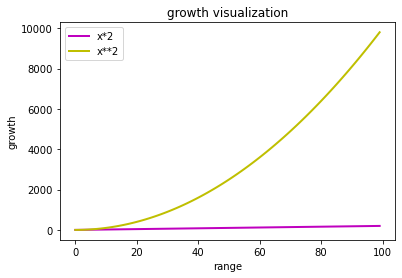

In [3]:
# Method 1

plt.plot(x, y, color='m', linewidth=2,label='x*2')
plt.plot(x, z, color='y', linewidth=2, label='x**2')

plt.xlabel('range')
plt.ylabel('growth')
plt.title('growth visualization')

plt.legend();

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

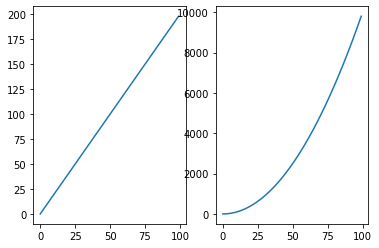

In [4]:
# Method 2

fig, ax = plt.subplots(ncols=2, nrows=1)
ax[0].plot(y)
ax[1].plot(z);

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

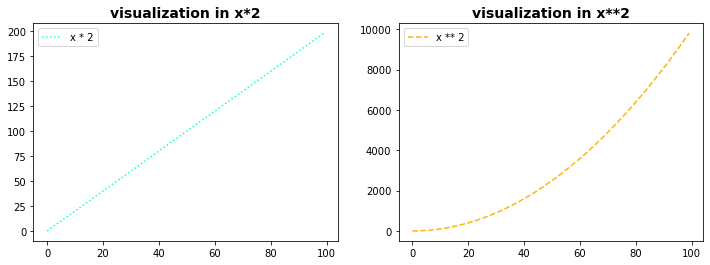

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
ax[0].plot(y, color='#0fffd7', ls='dotted', label='x * 2')
ax[0].set_title('visualization in x*2', fontweight='bold', fontsize=14)
ax[1].plot(z, color='#ffb30f', ls='--', label='x ** 2')
ax[1].set_title('visualization in x**2', fontweight='bold', fontsize=14)
ax[0].legend()
ax[1].legend()
plt.show();

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

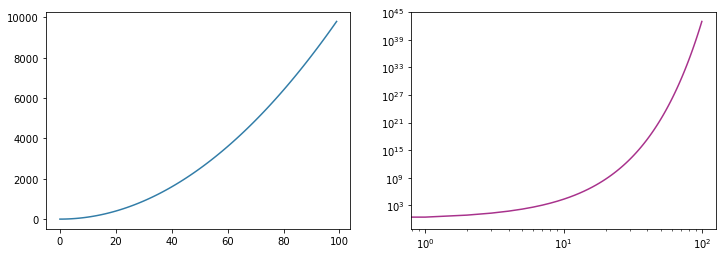

In [6]:
y = x**2
z = np.exp(x)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4))

ax[0].plot(y, color='#327da8', label='y = x ** 2')
ax[0].set_xscale('linear')
ax[0].set_xscale('linear')

ax[1].plot(z, color='#a8328c', label='y = e^x')
ax[1].set_yscale('log')
ax[1].set_xscale('log')

#### As a bonus challenge, try to add a legend to the plot.

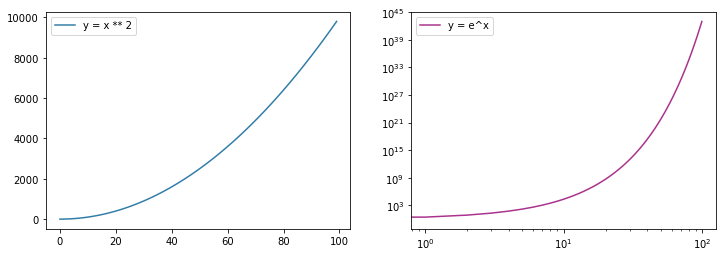

In [7]:
y = x**2
z = np.exp(x)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4))

ax[0].plot(y, color='#327da8', label='y = x ** 2')
ax[0].set_xscale('linear')
ax[0].set_xscale('linear')

ax[1].plot(z, color='#a8328c', label='y = e^x')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[0].legend()
ax[1].legend();

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
fitbit = pd.read_csv('../data/fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

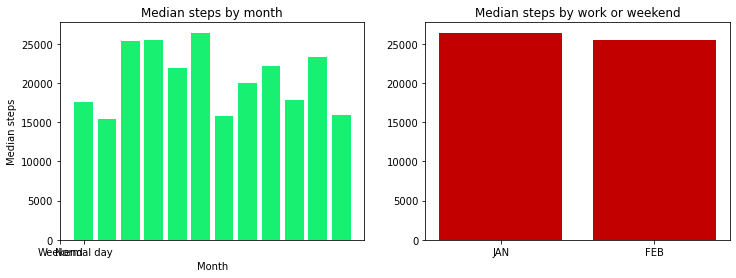

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
ax[0].bar(fitbit['Months_encoded'], fitbit['Steps'], color='#18f072')
ax[0].set(xlabel='Month', ylabel='Median steps')

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
plt.xticks(range(12), months)

plt.sca(ax[0])

ax[0].set_title('Median steps by month')

## MEDIAN STEPS BY WORK_OR_WEEKEND

ax[1].bar(fitbit['Work_or_Weekend'], fitbit['Steps'], color='#c20000')
change_x = ['Weekend', 'Normal day']

plt.xticks(range(2), change_x)

plt.sca(ax[1])

ax[1].set_title('Median steps by work or weekend')
plt.show();

In [11]:
fig.savefig('figures/fitbit_images.pdf', transparent=False, dpi=80, bbox_inches='tight')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [6]:
titanic = pd.read_csv('../data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [7]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [8]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=['int64', 'float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [9]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [51]:
fig = plt.figure(figsize=(12,6))
ax = plt.style.use('classic')

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

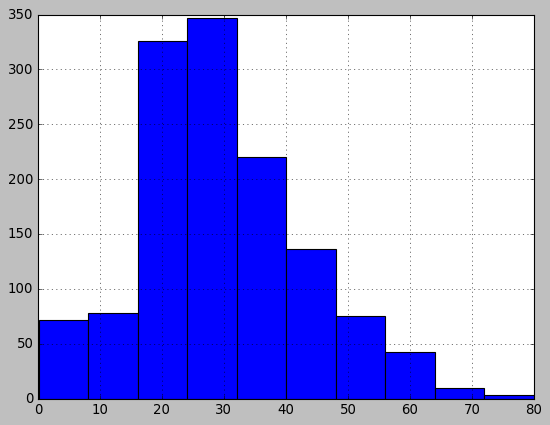

In [13]:
ax = titanic['Age'].hist()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

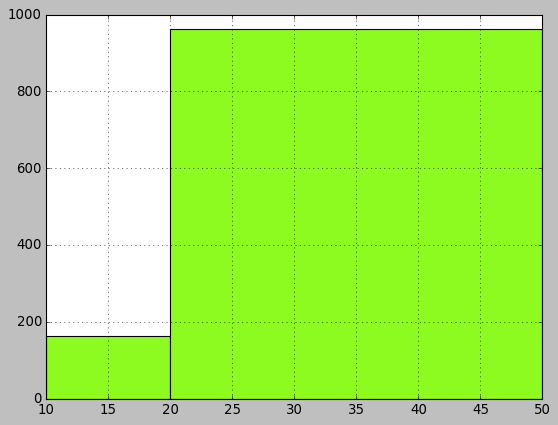

In [14]:
ax = titanic['Age'].hist(bins=(10,20,50), color='#8dfa20')

#### How does the bin size affect your plot?

In [ ]:
"""
makes the distribution less uneven
"""

#### Use seaborn to show the distribution of column `Age`.

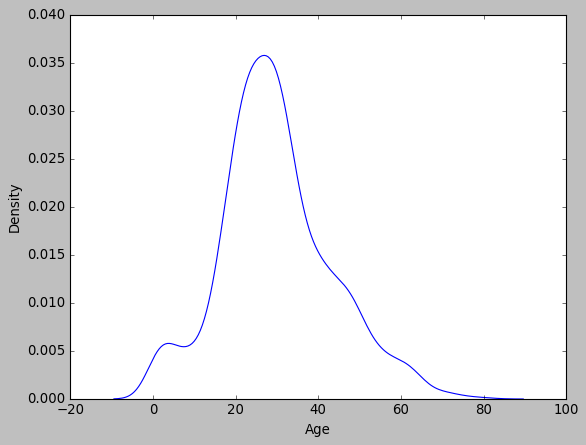

In [16]:
fig = plt.figure()
ax = sns.kdeplot(data=titanic, x='Age')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

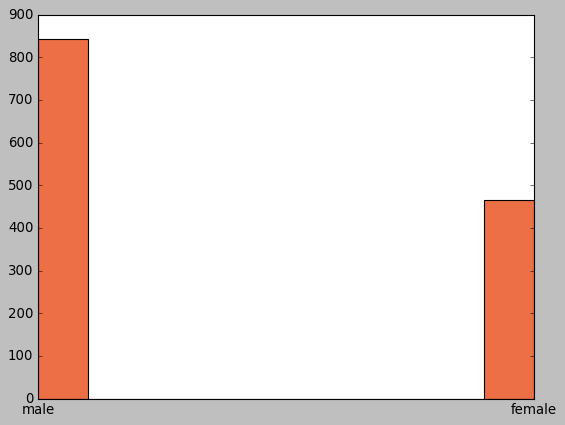

In [17]:
# Method 1 - matplotlib
plt.hist(titanic['Gender'], color='#ed6f45');

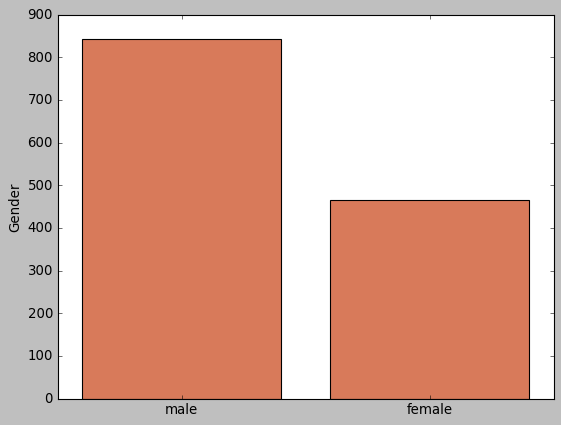

In [18]:
# Method 2 - seaborn
fig, ax = plt.subplots()
genders = titanic['Gender'].value_counts()
sns.barplot(data=titanic, x=genders.index, y=genders, color='#ed6f45');

#### Use the right plot to visualize the column `Pclass`.

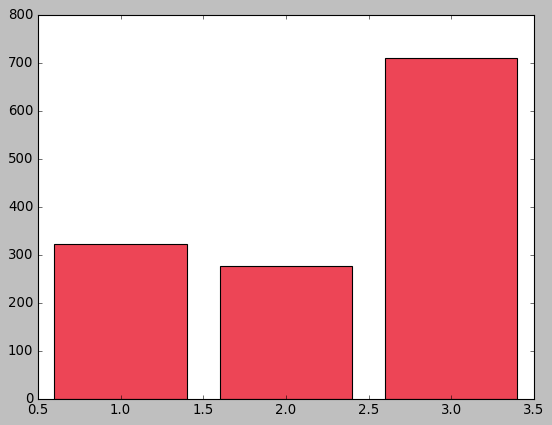

In [19]:
pclass_col = titanic['Pclass'].value_counts()
plt.bar(pclass_col.index, pclass_col, color='#ed4556');

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

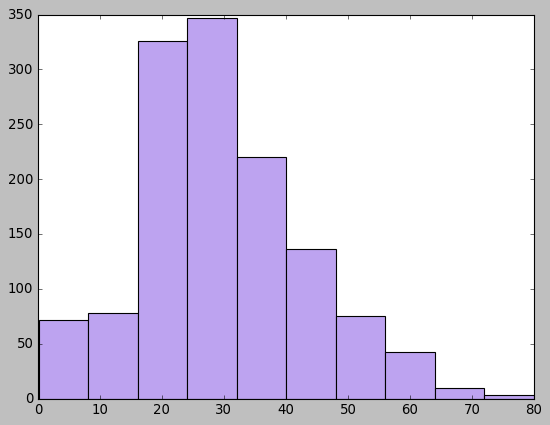

In [35]:
plt.hist(data=titanic, x='Age', color='#bda3f0');

In [ ]:
"""
histogram is an visualization easy to identify the summary statistics of the data
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
is a distribution with positive skewness which tells that most density of people are 20-30 years old,
there are less people under 20 years old that I could imagine
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

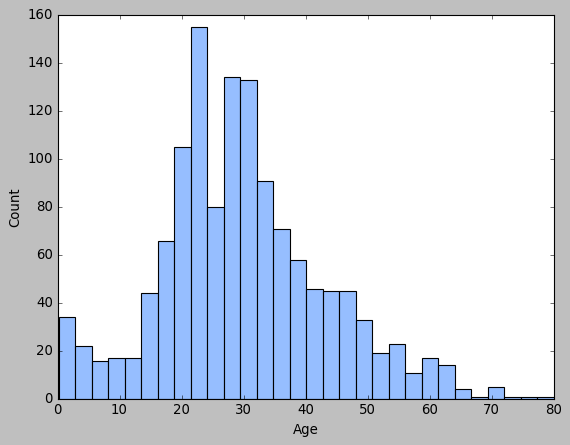

In [42]:
fig = plt.figure()
ax = sns.histplot(data=titanic, x='Age', color='#73a9ff');

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
in this histogram we can notice the distribution by ages that tells there are more babies that we could notice in
the last plot and also there is a significant decrease between 20-30 years old in people who are 25 years old
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

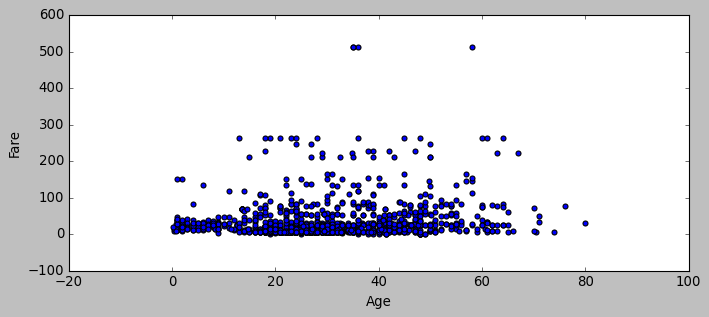

In [47]:
# Method 1 - matplotlib
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(titanic['Age'], titanic['Fare'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare');

<Figure size 640x480 with 0 Axes>

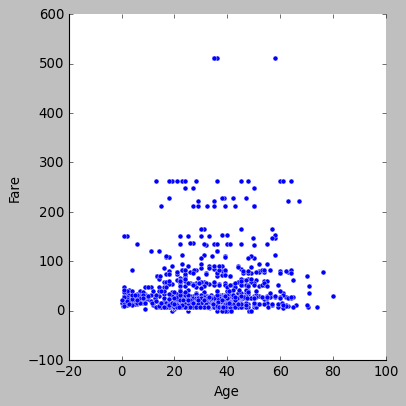

In [63]:
# Method 2 - seaborn
fig = plt.figure()
ax = sns.relplot(data=titanic, x='Age', y='Fare');

#### Plot the correlation matrix using seaborn.

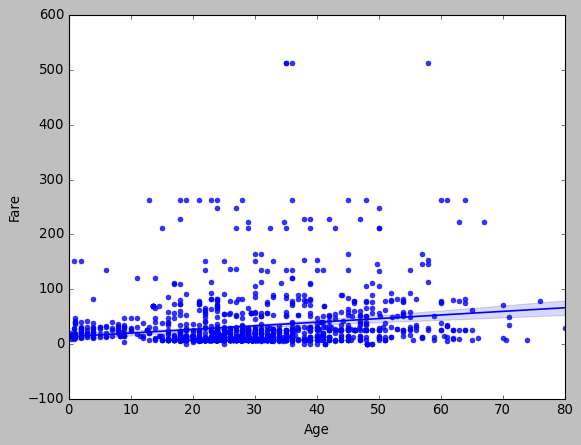

In [62]:
fig = plt.figure()
ax = sns.regplot(data=titanic, x='Age', y='Fare')

#### What are the most correlated features?

In [ ]:
"""
i'm not sure if what i did here is alright
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

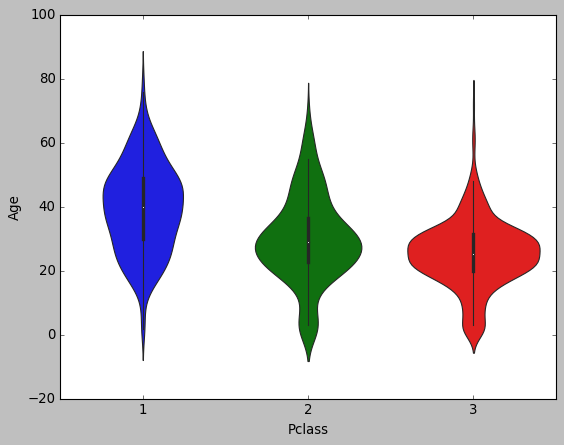

In [64]:
fig = plt.figure()
ax = sns.violinplot(data=titanic, x='Pclass', y='Age')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

/home/emily/anaconda3/envs/ironhack_env/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


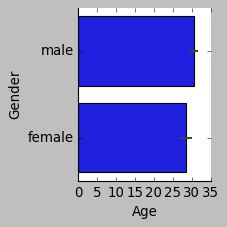

In [70]:
g = sns.FacetGrid(titanic)
g.map(sns.barplot, 'Age', 'Gender')

#i don't know how to use Facetgrid